<a href="https://colab.research.google.com/github/jenius13/Kaggle-data-analysis/blob/master/kaggle_DS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
question=pd.read_csv('/content/schema.csv')
question.head()
# question.shape

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [3]:
mcq=pd.read_csv('/content/multipleChoiceResponses.csv',encoding='ISO-8859-1',low_memory=False)
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

In [4]:
mcq.shape

(1827, 228)

In [5]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

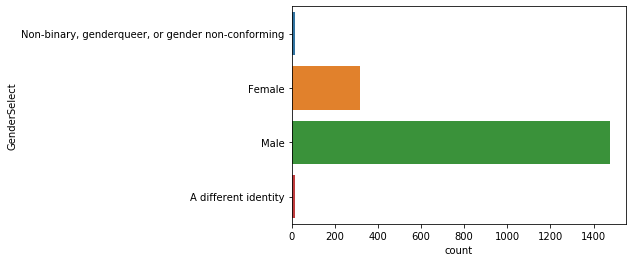

In [6]:
sns.countplot(y='GenderSelect',data=mcq)

In [7]:
con_df=pd.DataFrame(mcq['Country'].value_counts())
# print(con_df)
con_df['국가']=con_df.index

con_df.columns=['응답수','국가']
con_df=con_df.reset_index().drop('index',axis=1)
con_df.head(20)

,응답수,국가
0,554,United States
1,355,India
2,91,Other
3,67,Australia
4,64,People 's Republic of China
5,55,Russia
6,51,Canada
7,44,Brazil
8,37,Taiwan
9,36,Japan


In [8]:
mcq['Age'].describe()

count    1803.000000
mean       31.140322
std        10.326832
min         0.000000
25%        24.000000
50%        28.000000
75%        36.000000
max       100.000000
Name: Age, dtype: float64

In [9]:
age_df=pd.DataFrame(mcq['Age'].value_counts())

age_df['나이']=age_df.index

age_df.columns=['응답','나이']
age_df=age_df.reset_index().drop('index',axis=1)
age_df.head(20)

# 응답수라고 안나옴

,응답,나이
0,127,24.0
1,106,25.0
2,103,23.0
3,101,26.0
4,96,22.0
5,91,21.0
6,88,30.0
7,88,27.0
8,85,28.0
9,78,29.0


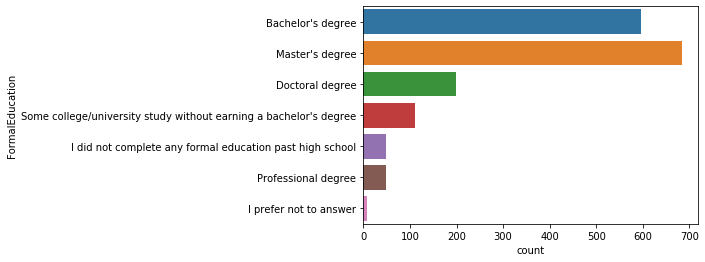

In [10]:
sns.countplot(y='FormalEducation',data=mcq)

In [11]:
pd.DataFrame(mcq['MajorSelect'].value_counts())

,MajorSelect
Computer Science,503
Mathematics or statistics,237
Electrical Engineering,171
Engineering (non-computer focused),140
Other,90
"Information technology, networking, or system administration",80
Physics,75
A social science,67
Biology,36
A humanities discipline,27


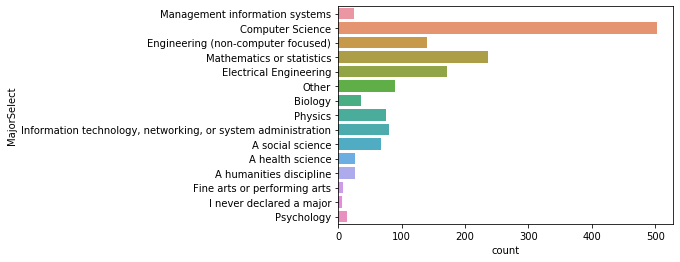

In [12]:
sns.countplot(y='MajorSelect',data=mcq)

In [13]:
major_df=pd.DataFrame(mcq['MajorSelect'].value_counts())
major_df_percent=pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))

mcq_merge=major_df.merge(major_df_percent*100,left_index=True,right_index=True)
# percent=major_df_percent.iloc[2,:]
mcq_merge.columns=['응답수','비율']

mcq_merge

,응답수,비율
Computer Science,503,33.421927
Mathematics or statistics,237,15.747508
Electrical Engineering,171,11.362126
Engineering (non-computer focused),140,9.302326
Other,90,5.980066
"Information technology, networking, or system administration",80,5.315615
Physics,75,4.983389
A social science,67,4.451827
Biology,36,2.392027
A humanities discipline,27,1.794020


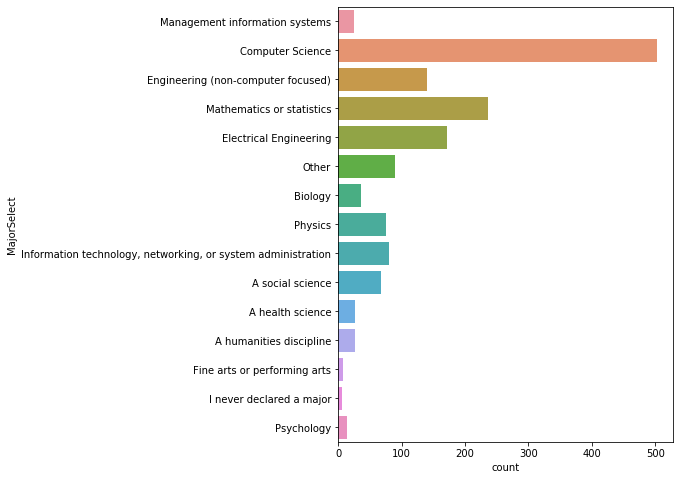

In [14]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect',data=mcq)

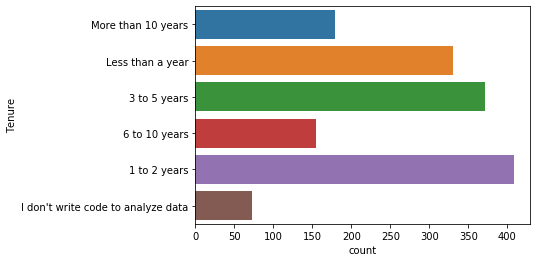

In [15]:
sns.countplot(y='Tenure',data=mcq)

In [0]:
korea=mcq.loc[(mcq['Country']=='South Korea')]

Text(0.5, 1.0, 'Korean')

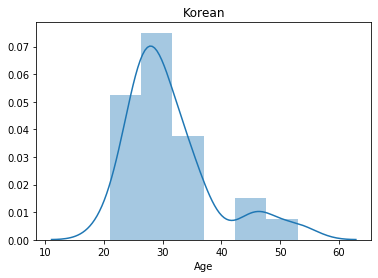

In [17]:
sns.distplot(korea['Age'].dropna())
plt.title('Korean')

In [18]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,14
Female,10
A different identity,1


Text(0.5, 1.0, 'Korean Male')

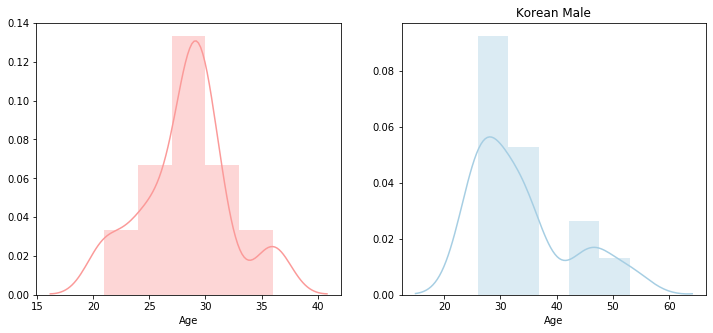

In [19]:
figure,(ax1,ax2)=plt.subplots(ncols=2)
figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
             norm_hist=False,color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
             norm_hist=False,color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('Korean Male')

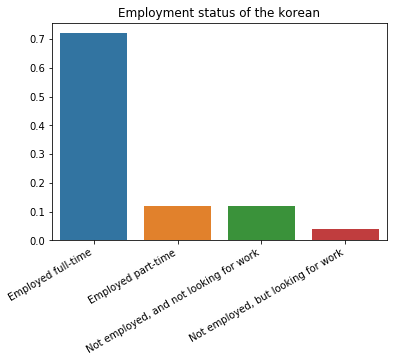

In [20]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

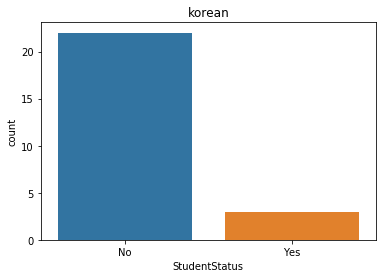

In [21]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [22]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(1073, 228)
(310, 228)


# 데이터 사이언스에서 주목 받을 것들?

In [25]:
mcq_ml_count=pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts()
)
mcq_ml_percent=pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True)
)
mcq_ml_table=mcq_ml_count.merge(mcq_ml_percent,left_index=True,right_index=True).head(20)

mcq_ml_table.columns=['응답수','비율']

mcq_ml_table



,응답수,비율
TensorFlow,373,0.226886
Python,248,0.150852
R,137,0.083333
Spark / MLlib,92,0.055961
Hadoop/Hive/Pig,71,0.043187
Other,60,0.036496
Jupyter notebooks,59,0.035888
Amazon Machine Learning,57,0.034672
Google Cloud Compute,50,0.030414
Amazon Web services,47,0.028589


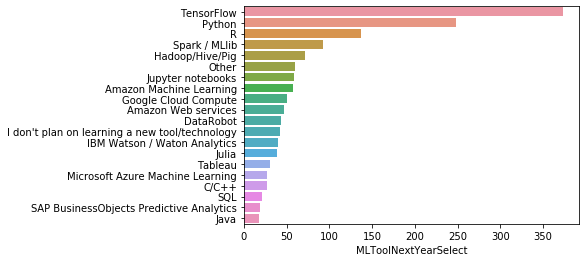

In [27]:
data=mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index,x=data)